# HW 7
## Problem 1
Plot bubble point temperature for butanes and pentanes as a function of pressure

The bubble point temperature is found by
$$
\sum_{i=1}^C z_i K_i=1 \tag{1}
$$
where Raoult's law can be used to find $K_i$
$$
K_i = \frac{P_i^{sat}}{P} \tag{2}
$$
and
the saturated pressure can be found using the Antoine equation
$$
log(P) = a-\frac{b}{c+T} \tag{3}
$$
The temperature can be solved numerically by iterating T at a specified P in ([2](#mjx-eqn-2)) and ([3](#mjx-eqn-3)) until ([1](#mjx-eqn-1)) holds true. 

|Component|$z_i=x_i$|$a$|$b$|$c$|
|------|------|---|---|---|
|i-Butane|0.0319|4.3281|1132.108|0.918|
|n-Butane|0.7992|4.35576|1175.581|-2.071|
|i-Pentane|0.1041|3.97183|1021.864|-43.231|
|n-Pentane|0.0648|3.9892|1070.617|-40.454|

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [14]:
def antoine(a,b,c,T):                                   #T in k
    return (10**(a-b/(T+c)))*.986923               #return pSat in atm

p = np.linspace(.5,5)                                   #domain of pressure

a = np.array([4.3281,4.35576,3.97183,3.9892])           #constants taken from nist
b = np.array([1132.108,1175.581,1021.864,1070.617])
c = np.array([0.918,-2.071,-43.231,-40.454])

zi = np.array([.0319,.7992,.1041,.0648])


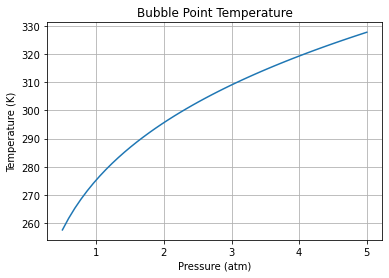

In [15]:
def resFun(T,p):                                        #using raoults law to get ki
    Ki = antoine(a,b,c,T)/p                             
    kz = np.sum(Ki*zi)-1                                    #sum ki,zi
    return kz
    
T = []
for i in p:                                             #array of T for every p
    T.append(opt.fsolve(resFun,300,i))

plt.plot(p,T)
plt.title('Bubble Point Temperature')
plt.ylabel('Temperature (K)')
plt.xlabel('Pressure (atm)')
plt.grid();


The bubble point temperature increases non-linearly as pressure increases.